__Statistical Learning in High Dimension__
<br>_Professor: M. Hebiri_
<br>_Students: M. Berezov, V. Oliinyk_
## TP4. Regression in high dimension and sparsity
_In this practical session we are studying lasso, ridge and elastic net regularization used to sparse data._

### Exercise 1. Regularization
#### 1.1 Sparse $\beta$

We observe linear model $Y = X\beta+\eta$ where $\eta\sim N(0,1), n=1000, \beta\in\{0,1\}^{5000},  \beta_1=...=\beta_{15}=1, \beta_{16}=...=\beta_{5000}=0$.
We suppose that the columns of $X$ are not correlated, i.i.d. standard normal.

In [239]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
n = 1000
p = 5000
s = 15
eta = np.random.normal(0, 1, n)
beta = np.concatenate([np.ones(s), np.zeros(p-s)])
X = np.random.standard_normal(size=(n, p))
Y = np.dot(X, beta) + eta

We split our sample into _train_ and _test_ subsamples in ratio 2:1.

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(666, 5000)
(666,)
(334, 5000)
(334,)


We are going to compare 3 estimators:
1. LASSO
$$\hat{\beta}^L(\lambda)=argmin_{\beta}{\frac{1}{2n}\sum_{i=1}^{n}({Y_i-X_{i,\cdot}\beta})^2+\lambda \|\beta\|_1}$$
where $\lambda >0$.
2. Ridge
$$\hat{\beta}^R(\mu)=argmin_{\beta}{\frac{1}{2n}\sum_{i=1}^{n}({Y_i-X_{i,\cdot}\beta})^2+\frac{\mu}{2} \|\beta\|^2_2}$$
where $\mu >0$.
3. Elastic Net
$$\hat{\beta}^{EN}(\lambda,\alpha)=argmin_{\beta}{\frac{1}{2n}\sum_{i=1}^{n}({Y_i-X_{i,\cdot}\beta})^2+\lambda(\alpha \|\beta\|_1+\frac{1-\alpha}{2} \|\beta\|^2_2)}$$
where $\lambda >0$ and $\alpha \in [0,1]$.

_1.a_ We estimate $\hat{\beta}^{EN}(\lambda, \alpha)$ for $\alpha\in\{0, 0.1, 0.2, ..., 0.9, 1\}$ using `ElasticNet` package from $sklearn.linear$_$model$

_Remark_ Notice that in $sklearn$ `ElasticNet` implementation the parameter `l1_ratio` corresponds to $\alpha$ in our notation while `alpha` corresponds to the $\lambda$.

In [303]:
# lambda = 1 by default
def calc_betas_EN(X,Y, alphas, fit_int):
    betas_EN = []
    for alpha in alphas:
        model_EN = ElasticNet(l1_ratio=alpha, fit_intercept = fit_int)
        model_EN.fit(X, Y)
        betas_EN.append(model_EN.coef_)
    betas_EN = np.transpose(np.array(betas_EN))
    return betas_EN

In [7]:
alphas = np.arange(11)/10
betas_EN = calc_betas_EN(X,Y,alphas,True)

/Users/mas/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [8]:
betas_EN

array([[ 0.16152154,  0.41527202,  0.44795254, ...,  0.17813038,
         0.10404837,  0.01572477],
       [ 0.13835386,  0.35175899,  0.40246225, ...,  0.08475504,
         0.        ,  0.        ],
       [ 0.14300412,  0.33837443,  0.37549864, ...,  0.03474514,
         0.        ,  0.        ],
       ..., 
       [-0.00893093, -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.01573487, -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.01660846,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [288]:
def plot_betas(betas_EN):
    plt.figure(1)
    plt.subplot(221)
    plt.stem(np.arange(len(betas_EN)), betas_EN[:,0], linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.subplot(222)
    plt.stem(np.arange(len(betas_EN)), betas_EN[:,3], linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.subplot(223)
    plt.stem(np.arange(len(betas_EN)), betas_EN[:,6], linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.subplot(224)
    plt.stem(np.arange(len(betas_EN)), betas_EN[:,10], linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.show()
    pass

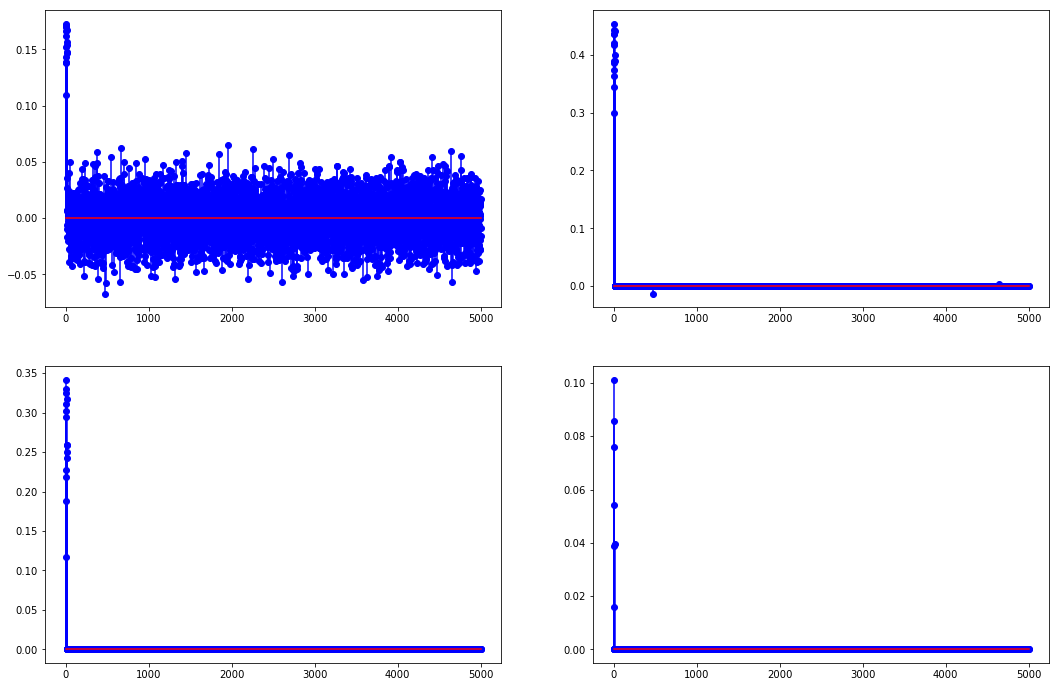

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 12
plot_betas(betas_EN)

_1.b_ Plot regularization path of Lasso, i.e. we plot the values of $\beta^L(\lambda)$ estimated for different $\lambda$.

In [14]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4

In [304]:
def lasso_path(X,Y, lambdas, fit_int):
    betas_L = []
    for lambd in lambdas:
        model_L = Lasso(alpha=lambd, fit_intercept = fit_int)
        model_L.fit(X, Y)
        betas_L.append(model_L.coef_)

    plt.plot(np.log10(lambdas), betas_L)
    plt.xlabel('Log(lambda)')
    plt.ylabel('coefficients')
    plt.title('Lasso Path')
    plt.show()
    pass

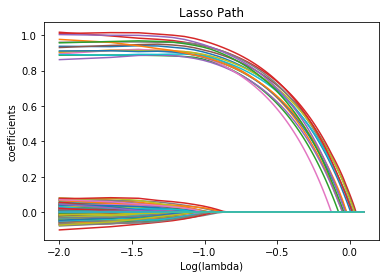

In [16]:
lambdas = np.linspace(0.01,1.25,100)
lasso_path(X,Y,lambdas,True)

_1.c_ Optimal values of regularization parameters. We understand optimality in the sense of minimzation of MSE. We are using only train set.

In [305]:
# Lasso  CV
def lasso(X,Y, lambdas, n_folds, fit_int):
    MSE_L = []
    kf = KFold(len(X), n_folds=n_folds)
    for lambd in lambdas:
        errs = []
        model_L = Lasso(alpha=lambd, fit_intercept = fit_int)
        for train, val in kf:
            model_L.fit(X[train], Y[train])
            errs.append(mean_squared_error(Y[val], model_L.predict(X[val])))
        MSE_L.append(np.mean(errs))
    return MSE_L

In [18]:
lambdas = np.linspace(0.001,2,100)
MSE_L = lasso(X_train, Y_train, lambdas, 2,True)
opt_lambda_L = lambdas[np.argmin(MSE_L)]
print("The optimal mu for Lasso Regression: "+ str(opt_lambda_L))

The optimal mu for Lasso Regression: 0.10195959596


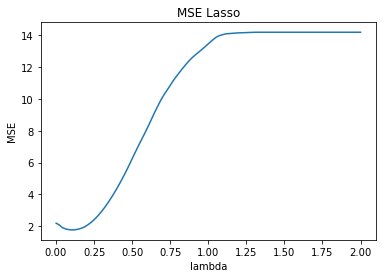

In [19]:
plt.plot(lambdas, MSE_L)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('MSE Lasso')
plt.show()
plt.show()

In [301]:
# Ridge CV
def ridge(X,Y,mus, n_folds, fit_int):
    MSE_R = []
    kf = KFold(len(X_train), n_folds=n_folds)
    for mu in mus:
        model_R = Ridge(alpha=mu, fit_intercept = fit_int)
        errs = []
        for train, val in kf:
            model_R.fit(X[train], Y[train])
            errs.append(mean_squared_error(Y[val], model_R.predict(X[val])))
        MSE_R.append(np.mean(errs))
    return MSE_R

In [21]:
mus = np.linspace(0.001,10**4,50)
MSE_R = ridge(X_train, Y_train, mus, 2, True)
opt_mu_R = mus[np.argmin(MSE_R)]
print("The optimal lambda for Ridge Regression: "+ str(opt_mu_R))

The optimal lambda for Ridge Regression: 4693.87808163


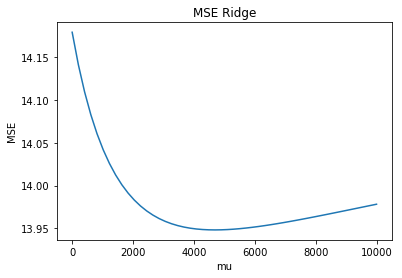

In [22]:
plt.plot(mus, MSE_R)
plt.xlabel('mu')
plt.ylabel('MSE')
plt.title('MSE Ridge')
plt.show()
plt.show()

In [306]:
# Elastic Net
def enet(X,Y,lambdas_EN, alphas, n_folds, fit_int):
    MSE_EN = np.zeros((len(lambdas_EN),len(alphas)))
    kf = KFold(len(X), n_folds=n_folds)
    for i,lambd in enumerate(lambdas_EN):
        for j, alpha in enumerate(alphas):
            errs = []
            model_EN = ElasticNet(alpha = lambd, l1_ratio=alpha, fit_intercept = fit_int)
            for train, val in kf:
                model_EN.fit(X[train], Y[train])
                errs.append(mean_squared_error(Y[val], model_EN.predict(X[val])))
            MSE_EN[i,j] = np.mean(errs)
    return MSE_EN

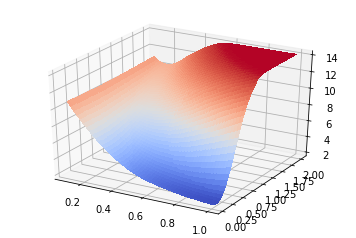

In [25]:
lambdas_EN = np.linspace(0.05,2,50)
alphas = np.linspace(0.1,1,50)
MSE_EN = enet(X_train, Y_train, lambdas_EN, alphas, 2, True)
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
XX, YY = np.meshgrid(alphas, lambdas_EN)
ZZ = MSE_EN
# Plot the surface.
surf = ax.plot_surface(XX,YY, ZZ, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [26]:
opt_inds_EN = np.argwhere(MSE_EN == np.min(MSE_EN))
opt_lambda_EN = lambdas[opt_inds_EN[0][0]]
opt_alpha_EN = alphas[opt_inds_EN[0][1]]
print("The optimal lambda for Elastic Net: "+ str(opt_lambda_EN))
print("The optimal alpha for Elastic Net: "+ str(opt_alpha_EN))

The optimal lambda for Elastic Net: 0.0211919191919
The optimal alpha for Elastic Net: 1.0


In [27]:
# Elastic Net
lambdas_EN = np.linspace(0.01,2,50)
alpha = 1
alphas = np.linspace(0.1,1,50)
MSE_EN = []
kf = KFold(len(X_train), n_folds=2)
for lambd in lambdas_EN:
    errs = []
    model_EN = ElasticNet(alpha = lambd, l1_ratio=alpha, fit_intercept = True)
    for train, val in kf:
        model_EN.fit(X_train[train], Y_train[train])
        errs.append(mean_squared_error(Y_train[val], model_EN.predict(X_train[val])))
    MSE_EN.append(np.mean(errs))

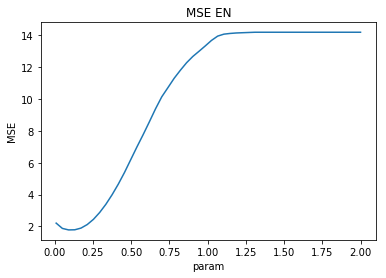

In [28]:
plt.plot(lambdas_EN, MSE_EN)
plt.xlabel('param')
plt.ylabel('MSE')
plt.title('MSE EN')
plt.show()
plt.show()

_1.d_ Knowing the optimal parameters for each estimator, let's select the estimator which delivers the best result on the test set.

In [29]:
model_L = Lasso(alpha=opt_lambda_L, fit_intercept = True)
model_L.fit(X_train, Y_train)
MSE_L_test = mean_squared_error(Y_test, model_L.predict(X_test))
print(MSE_L_test)
model_R = Ridge(alpha=opt_mu_R, fit_intercept = True)
model_R.fit(X_train, Y_train)
MSE_R_test = mean_squared_error(Y_test, model_R.predict(X_test))
print(MSE_R_test)
model_EN = ElasticNet(alpha = opt_lambda_EN, l1_ratio=opt_alpha_EN, fit_intercept = True)
model_EN.fit(X_train, Y_train)
MSE_EN_test = mean_squared_error(Y_test, model_EN.predict(X_test))
print(MSE_EN_test)

1.46046878312
16.9213588996
1.85023094206


#### _1.2_ 1500 non-zero coefficients
_2._  $\beta_1=...=\beta_{1500}=1, \beta_{1501}=...=\beta_{5000}=0$.

In [30]:
n = 1000
p = 5000
s = 1500
eta = np.random.normal(0, 1, n)
beta = np.concatenate([np.ones(s), np.zeros(p-s)])
X = np.random.standard_normal(size=(n, p))
Y = np.dot(X, beta) + eta

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

_1.a_

In [32]:
alphas = np.arange(11)/10
betas_EN = calc_betas_EN(X,Y,alphas, True)

/Users/mas/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [33]:
betas_EN

array([[-0.18006583, -0.16722079, -0.17504207, ..., -0.00539654,
        -0.        , -0.        ],
       [ 0.39278853,  0.43931698,  0.48434757, ...,  0.73724308,
         0.72098499,  0.64896245],
       [ 0.16682723,  0.12551325,  0.10764583, ...,  0.0735626 ,
         0.01022173,  0.        ],
       ..., 
       [-0.32619111, -0.32390911, -0.31787338, ..., -0.178299  ,
        -0.06712269, -0.        ],
       [ 0.36146661,  0.37254159,  0.34174299, ...,  0.        ,
         0.        ,  0.        ],
       [-0.06630072, -0.0242809 , -0.        , ..., -0.        ,
        -0.        , -0.        ]])

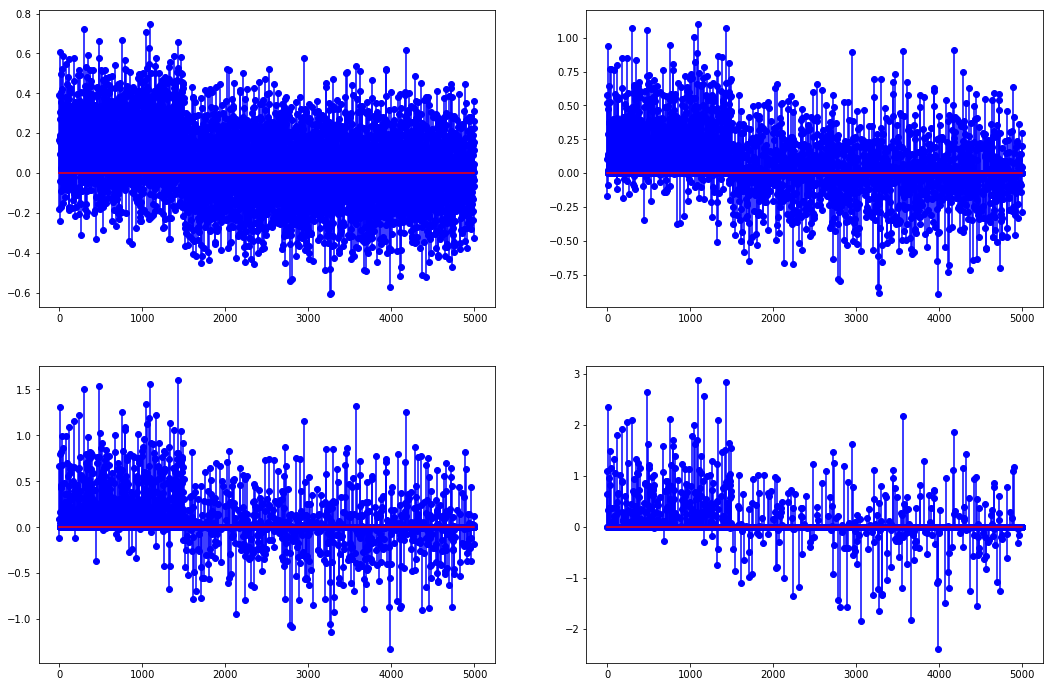

In [34]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 12
plot_betas(betas_EN)

_1.b_

In [35]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4

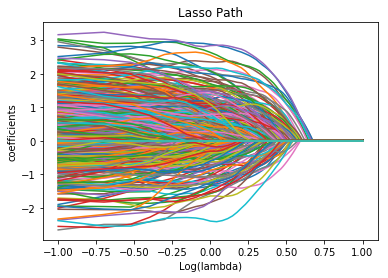

In [39]:
lambdas = np.linspace(0.1,10,100)
lasso_path(X,Y,lambdas, True)

_1.c_

In [44]:
# Lasso
lambdas = np.linspace(0.1,13,100)
MSE_L = lasso(X_train, Y_train, lambdas, 2, True)
opt_lambda_L = lambdas[np.argmin(MSE_L)]
print("The optimal mu for Lasso Regression: "+ str(opt_lambda_L))

The optimal mu for Lasso Regression: 5.57272727273


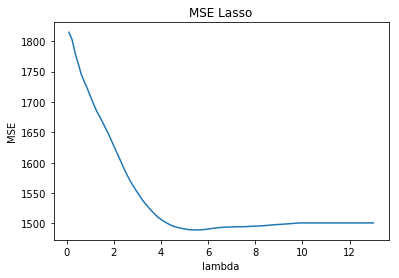

In [45]:
plt.plot(lambdas, MSE_L)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('MSE Lasso')
plt.show()
plt.show()

In [48]:
# Ridge
mus = np.linspace(0.001,10**3,50)
MSE_R = ridge(X_train, Y_train, mus, 2, True)
opt_mu_R = mus[np.argmin(MSE_R)]
print("The optimal lambda for Ridge Regression: "+ str(opt_mu_R))

The optimal lambda for Ridge Regression: 408.163857143


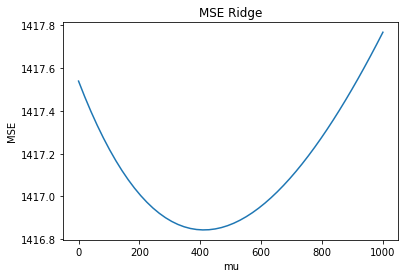

In [49]:
plt.plot(mus, MSE_R)
plt.xlabel('mu')
plt.ylabel('MSE')
plt.title('MSE Ridge')
plt.show()
plt.show()

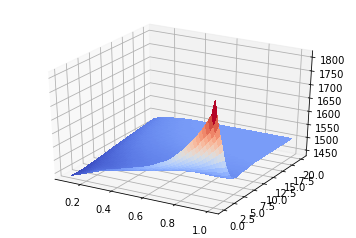

In [60]:
# Elastic Net
lambdas_EN = np.linspace(0.1,20,50)
alphas = np.linspace(0.1,1,50)
MSE_EN = enet(X_train, Y_train, lambdas_EN, alphas, 2,True)
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
XX, YY = np.meshgrid(alphas, lambdas_EN)
ZZ = MSE_EN
# Plot the surface.
surf = ax.plot_surface(XX,YY, ZZ, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [61]:
opt_inds_EN = np.argwhere(MSE_EN == np.min(MSE_EN))
opt_lambda_EN = lambdas[opt_inds_EN[0][0]]
opt_alpha_EN = alphas[opt_inds_EN[0][1]]
print("The optimal lambda for Elastic Net: "+ str(opt_lambda_EN))
print("The optimal alpha for Elastic Net: "+ str(opt_alpha_EN))

The optimal lambda for Elastic Net: 0.490909090909
The optimal alpha for Elastic Net: 0.1


In [58]:
# Elastic Net
lambdas_EN = np.linspace(0.1,20,50)
alpha = 0.5
MSE_EN = []
kf = KFold(len(X_train), n_folds=2)
for lambd in lambdas_EN:
    errs = []
    model_EN = ElasticNet(alpha = lambd, l1_ratio=alpha, fit_intercept = True)
    for train, val in kf:
        model_EN.fit(X_train[train], Y_train[train])
        errs.append(mean_squared_error(Y_train[val], model_EN.predict(X_train[val])))
    MSE_EN.append(np.mean(errs))

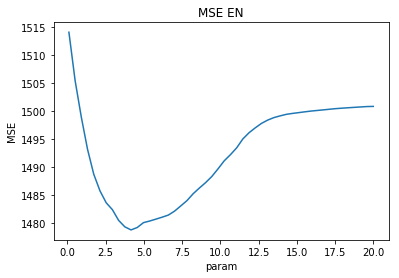

In [59]:
plt.plot(lambdas_EN, MSE_EN)
plt.xlabel('param')
plt.ylabel('MSE')
plt.title('MSE EN')
plt.show()
plt.show()

_1.d_ Knowing the optimal parameters for each estimator, let's select the estimator which delivers the best result on the test set.

In [62]:
model_L = Lasso(alpha=opt_lambda_L, fit_intercept = True)
model_L.fit(X_train, Y_train)
MSE_L_test = mean_squared_error(Y_test, model_L.predict(X_test))
print(MSE_L_test)
model_R = Ridge(alpha=opt_mu_R, fit_intercept = True)
model_R.fit(X_train, Y_train)
MSE_R_test = mean_squared_error(Y_test, model_R.predict(X_test))
print(MSE_R_test)
model_EN = ElasticNet(alpha = opt_lambda_EN, l1_ratio=opt_alpha_EN, fit_intercept = True)
model_EN.fit(X_train, Y_train)
MSE_EN_test = mean_squared_error(Y_test, model_EN.predict(X_test))
print(MSE_EN_test)

1541.7765682
1263.09873046
1272.88287147


#### _1.3_  Correlated columns
$n=100, p = 50, \beta_1=\beta_2=10, \beta_3=\beta_4=5, \beta_5...=\beta_{14}=1, \beta_{15}=...=\beta_{50}=0$.

Correlated features: $cov(X_{k,i} = X_{k,j})=0.7^{|i-j|}$.

In [93]:
n = 100
p = 50
eta = np.random.normal(0, 1, n)
beta = np.concatenate([[10, 10, 5, 5], np.ones(10), np.zeros(p-14)])
cov = np.zeros([p,p])
for i in range(p):
    for j in range(p):
        cov[i][j] = 0.7**(np.abs(i-j))

In [96]:
X = np.random.multivariate_normal(np.zeros(p), cov, n)
Y = np.dot(X, beta) + eta

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

_1.a_

In [98]:
alphas = np.arange(11)/10
betas_EN = calc_betas_EN(X,Y,alphas,True)

/Users/mas/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [99]:
betas_EN

array([[  5.81124250e+00,   6.00752989e+00,   6.21713648e+00,
          6.44172386e+00,   6.69698761e+00,   6.98157132e+00,
          7.30231376e+00,   7.64538747e+00,   8.02875087e+00,
          8.47984736e+00,   9.00951649e+00],
       [  6.72897951e+00,   6.95151216e+00,   7.19152335e+00,
          7.45134400e+00,   7.72226240e+00,   8.01634405e+00,
          8.35837754e+00,   8.73926399e+00,   9.15087570e+00,
          9.66657680e+00,   1.04122181e+01],
       [  4.39721768e+00,   4.46895267e+00,   4.53667061e+00,
          4.60621968e+00,   4.66440425e+00,   4.69675388e+00,
          4.69216781e+00,   4.63872367e+00,   4.53801635e+00,
          4.30225421e+00,   3.74491471e+00],
       [  3.44206768e+00,   3.51409941e+00,   3.59309963e+00,
          3.67851976e+00,   3.76645759e+00,   3.84338581e+00,
          3.92504739e+00,   4.03618417e+00,   4.14168489e+00,
          4.28154570e+00,   4.50744201e+00],
       [  1.71140181e+00,   1.69857663e+00,   1.67836032e+00,
          1.65

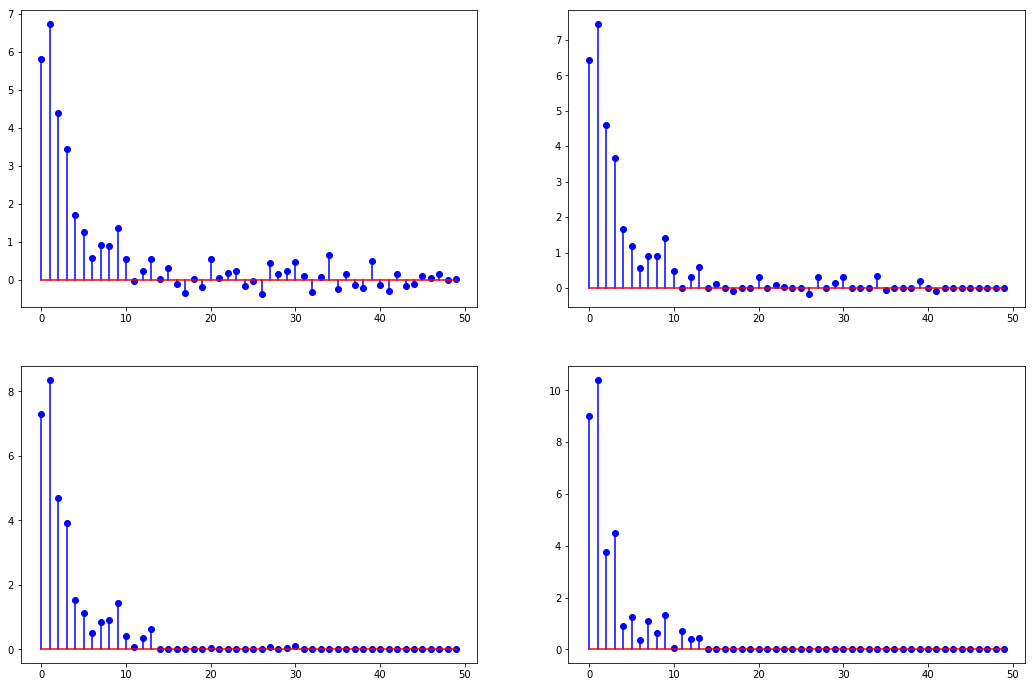

In [100]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 12
plot_betas(betas_EN)

_1.b_

In [101]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4

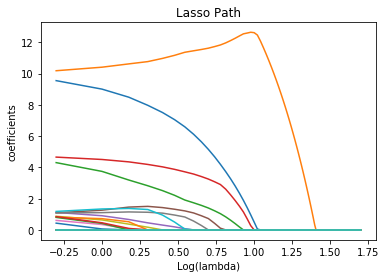

In [112]:
lambdas = np.linspace(0.5,50,100)
lasso_path(X,Y,lambdas,True)

_1.c_

In [194]:
# Lasso
lambdas = np.linspace(0.00001,10,100)
MSE_L = lasso(X_train, Y_train, lambdas, 2,True)
opt_lambda_L = lambdas[np.argmin(MSE_L)]
print("The optimal mu for Lasso Regression: "+ str(opt_lambda_L))

The optimal mu for Lasso Regression: 0.10102


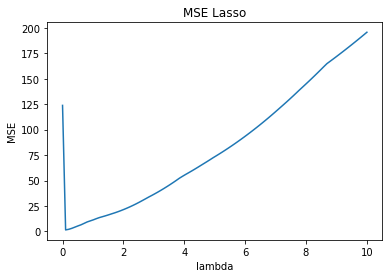

In [195]:
plt.plot(lambdas, MSE_L)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('MSE Lasso')
plt.show()
plt.show()

In [233]:
# Ridge
mus = np.linspace(0.001,5,100)
MSE_R = ridge(X_train, Y_train, mus, 5,True)
opt_mu_R = mus[np.argmin(MSE_R)]
print("The optimal lambda for Ridge Regression: "+ str(opt_mu_R))

The optimal lambda for Ridge Regression: 0.758424242424


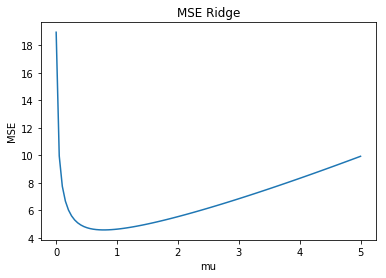

In [234]:
plt.plot(mus, MSE_R)
plt.xlabel('mu')
plt.ylabel('MSE')
plt.title('MSE Ridge')
plt.show()
plt.show()

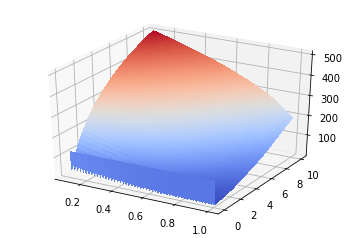

In [222]:
# Elastic Net
lambdas_EN = np.linspace(0.0000001,10,100)
alphas = np.linspace(0.1,1,50)
MSE_EN = enet(X_train, Y_train, lambdas_EN, alphas, 2,True)
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
XX, YY = np.meshgrid(alphas, lambdas_EN)
ZZ = MSE_EN
# Plot the surface.
surf = ax.plot_surface(XX,YY, ZZ, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [223]:
opt_inds_EN = np.argwhere(MSE_EN == np.min(MSE_EN))
opt_lambda_EN = lambdas[opt_inds_EN[0][0]]
opt_alpha_EN = alphas[opt_inds_EN[0][1]]
print("The optimal lambda for Elastic Net: "+ str(opt_lambda_EN))
print("The optimal alpha for Elastic Net: "+ str(opt_alpha_EN))

The optimal lambda for Elastic Net: 0.10102
The optimal alpha for Elastic Net: 1.0


In [220]:
# Elastic Net
lambdas_EN = np.linspace(0.0000001,10,50)
alpha = 1
MSE_EN = []
kf = KFold(len(X_train), n_folds=2)
for lambd in lambdas_EN:
    errs = []
    model_EN = ElasticNet(alpha = lambd, l1_ratio=alpha, fit_intercept = True)
    for train, val in kf:
        model_EN.fit(X_train[train], Y_train[train])
        errs.append(mean_squared_error(Y_train[val], model_EN.predict(X_train[val])))
    MSE_EN.append(np.mean(errs))

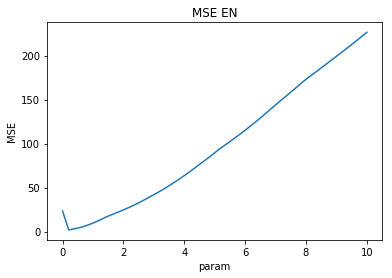

In [221]:
plt.plot(lambdas_EN, MSE_EN)
plt.xlabel('param')
plt.ylabel('MSE')
plt.title('MSE EN')
plt.show()
plt.show()

_1.d_ Knowing the optimal parameters for each estimator, let's select the estimator which delivers the best result on the test set.

In [235]:
model_L = Lasso(alpha=opt_lambda_L, fit_intercept = True)
model_L.fit(X_train, Y_train)
MSE_L_test = mean_squared_error(Y_test, model_L.predict(X_test))
print(MSE_L_test)
model_R = Ridge(alpha=opt_mu_R, fit_intercept = True)
model_R.fit(X_train, Y_train)
MSE_R_test = mean_squared_error(Y_test, model_R.predict(X_test))
print(MSE_R_test)
model_EN = ElasticNet(alpha = opt_lambda_EN, l1_ratio=opt_alpha_EN, fit_intercept = True)
model_EN.fit(X_train, Y_train)
MSE_EN_test = mean_squared_error(Y_test, model_EN.predict(X_test))
print(MSE_EN_test)

0.961920423616
3.00083691722
0.961920423616


### Exercise 2. Real data

Now, we exploit the methodology suggested above to estimate __house prices__ given their multiple characteristics.

<br> House Prices prediction is one of the Kaggle competitions and the dataset is available at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.
<br>


Final dataset after preprocessing can be found at https://github.com/maxberezov/Projects/blob/master/pneum-2.csv

<br>_Remark_

In [265]:
data = pd.read_csv('/Users/mas/Documents/UPEM/Kaggle/train.csv')
Y = np.log1p(data['SalePrice'])
data = data.drop(['SalePrice','Id'],axis = 1)
numeric_feats = data.dtypes[data.dtypes != "object"].index
data = data[numeric_feats]
data = data.fillna(data.mean())

In [266]:
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [267]:
from scipy.stats import skew
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
data[skewed_feats] = np.log1p(data[skewed_feats])

In [268]:
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [279]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
scaled = scaler.fit_transform(data)
X = scaled
pd.DataFrame(scaled)[:10]

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.146983,-0.271908,-0.267660,0.5,0.0,0.652174,0.243243,1.034410,0.092710,0.000000,...,0.281573,0.000000,0.205247,0.000000,0.000000,0.0,0.0,0.000000,-1.333333,0.0
1,-0.728398,0.483365,0.029682,0.0,3.0,0.065217,-0.486486,0.000000,0.142255,0.000000,...,-0.082816,1.111220,-0.769489,0.000000,0.000000,0.0,0.0,0.000000,-0.333333,-0.5
2,0.146983,-0.107971,0.399288,0.5,0.0,0.608696,0.216216,0.997317,0.035971,0.000000,...,0.530021,0.000000,0.118822,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0
3,0.271602,-0.562448,0.017513,0.5,0.0,-1.260870,-0.648649,0.000000,-0.087072,0.000000,...,0.670807,0.000000,0.076857,5.609472,0.000000,0.0,0.0,0.000000,-1.333333,-1.0
4,0.146983,0.661133,0.951802,1.0,0.0,0.586957,0.162162,1.147496,0.081314,0.000000,...,1.474120,1.025886,0.279765,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.0
5,0.000000,0.704267,0.927984,-0.5,0.0,0.434783,0.027027,0.000000,0.098207,0.000000,...,0.000000,0.723907,0.041541,0.000000,5.771441,0.0,0.0,6.552508,1.333333,0.5
6,-0.728398,0.248384,0.144304,1.0,0.0,0.673913,0.297297,1.024210,0.193403,0.000000,...,0.645963,1.080953,0.189496,0.000000,0.000000,0.0,0.0,0.000000,0.666667,-0.5
7,0.146983,0.000000,0.212172,0.5,1.0,0.000000,-0.567568,1.073880,0.122528,3.496508,...,0.016563,1.065095,0.487686,5.433722,0.000000,0.0,0.0,5.860786,1.666667,0.5
8,0.000000,-1.151158,-1.019410,0.5,0.0,-0.913043,-1.189189,0.000000,-0.905951,0.000000,...,-0.049689,0.879327,-0.769489,5.327876,0.000000,0.0,0.0,0.000000,-0.666667,0.0
9,1.083971,-1.222771,-0.570567,-0.5,1.0,-0.739130,-1.189189,0.000000,0.121106,0.000000,...,-1.138716,0.000000,-0.389376,0.000000,0.000000,0.0,0.0,0.000000,-1.666667,0.0


In [280]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [330]:
X = np.array(X)
Y = np.array(Y)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [331]:
print(X.shape, Y.shape)

(1460, 36) (1460,)


In [332]:
alphas = np.arange(11)/10
betas_EN = calc_betas_EN(X,Y,alphas,False)

/Users/mas/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [333]:
betas_EN

array([[ -5.68673812e-01,  -5.25225075e-01,  -4.74614824e-01,
         -4.04871069e-01,  -3.19470623e-01,  -2.22629170e-01,
         -1.18240907e-01,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00],
       [ -2.35677596e-01,  -2.00235210e-01,  -1.61337346e-01,
         -1.16704053e-01,  -6.05398456e-02,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00],
       [ -1.65203658e-01,  -1.26878331e-01,  -8.44377787e-02,
         -3.36306468e-02,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00],
       [  4.49790444e-01,   3.94645215e-01,   3.28556744e-01,
          2.53218568e-01,   1.53433795e-01,   2.49680167e-02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.07334404e+00,   1.07027092e+00,   1.06488056e+00,
          1.05

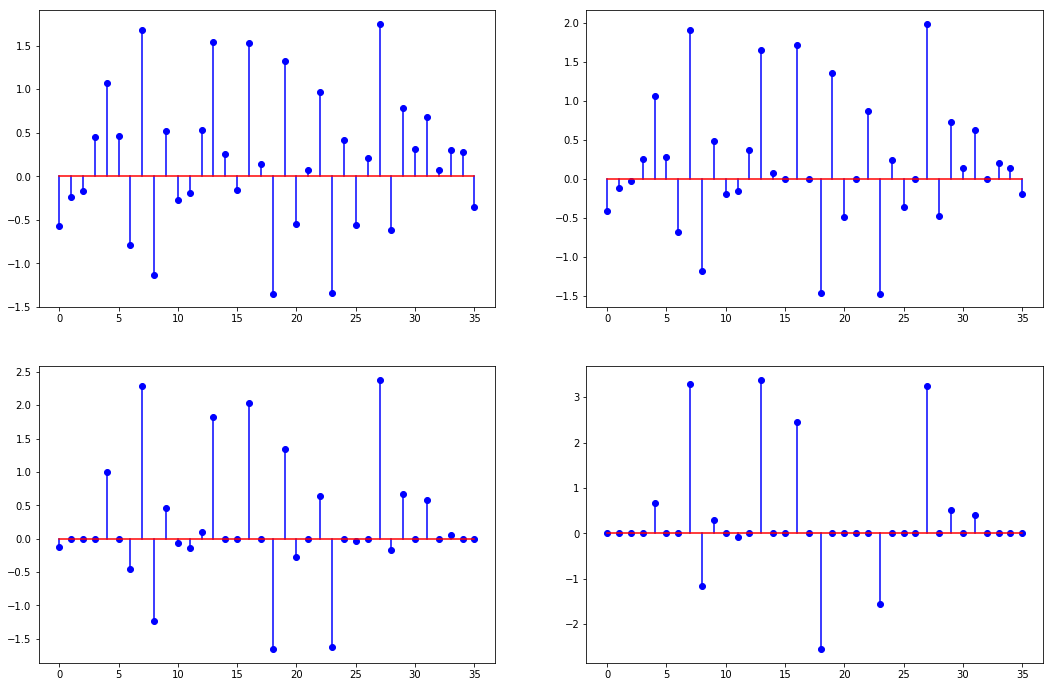

In [334]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 12
plot_betas(betas_EN)

In [335]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4

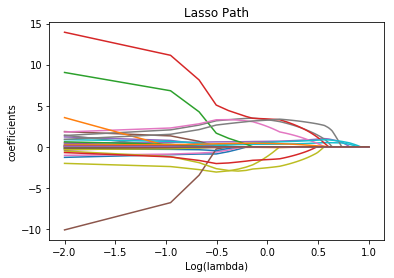

In [355]:
lambdas = np.linspace(0.01,10,100)
lasso_path(X,Y,lambdas,False)

In [358]:
# Lasso
lambdas = np.linspace(0.01,10,100)
MSE_L = lasso(X_train, Y_train, lambdas, 30,False)
opt_lambda_L = lambdas[np.argmin(MSE_L)]
print("The optimal mu for Lasso Regression: "+ str(opt_lambda_L))

The optimal mu for Lasso Regression: 0.01


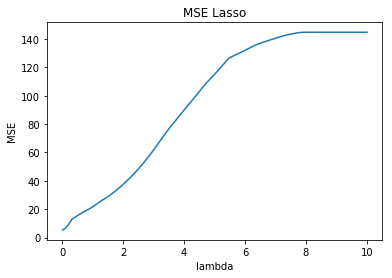

In [359]:
plt.plot(lambdas, MSE_L)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('MSE Lasso')
plt.show()
plt.show()

In [388]:
# Ridge
mus = np.linspace(0.0001,3,100)
MSE_R = ridge(X_train, Y_train, mus, 5, False)
opt_mu_R = mus[np.argmin(MSE_R)]
print("The optimal lambda for Ridge Regression: "+ str(opt_mu_R))

The optimal lambda for Ridge Regression: 0.333422222222


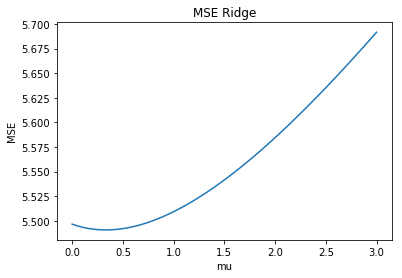

In [389]:
plt.plot(mus, MSE_R)
plt.xlabel('mu')
plt.ylabel('MSE')
plt.title('MSE Ridge')
plt.show()
plt.show()

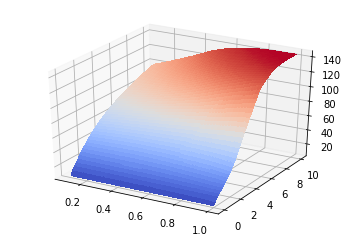

In [371]:
# Elastic Net
lambdas_EN = np.linspace(0.0000001,10,100)
alphas = np.linspace(0.1,1,50)
MSE_EN = enet(X_train, Y_train, lambdas_EN, alphas, 2,False)
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
XX, YY = np.meshgrid(alphas, lambdas_EN)
ZZ = MSE_EN
# Plot the surface.
surf = ax.plot_surface(XX,YY, ZZ, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [372]:
opt_inds_EN = np.argwhere(MSE_EN == np.min(MSE_EN))
opt_lambda_EN = lambdas[opt_inds_EN[0][0]]
opt_alpha_EN = alphas[opt_inds_EN[0][1]]
print("The optimal lambda for Elastic Net: "+ str(opt_lambda_EN))
print("The optimal alpha for Elastic Net: "+ str(opt_alpha_EN))

The optimal lambda for Elastic Net: 0.01
The optimal alpha for Elastic Net: 1.0


In [384]:
# Elastic Net
lambdas_EN = np.linspace(0.01,3,50)
alpha = 1
MSE_EN = []
kf = KFold(len(X_train), n_folds=2)
for lambd in lambdas_EN:
    errs = []
    model_EN = ElasticNet(alpha = lambd, l1_ratio=alpha, fit_intercept = False)
    for train, val in kf:
        model_EN.fit(X_train[train], Y_train[train])
        errs.append(mean_squared_error(Y_train[val], model_EN.predict(X_train[val])))
    MSE_EN.append(np.mean(errs))

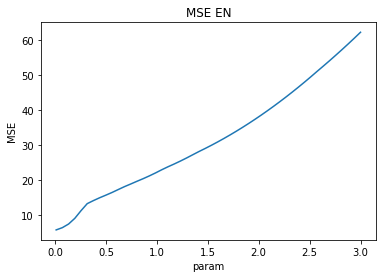

In [385]:
plt.plot(lambdas_EN, MSE_EN)
plt.xlabel('param')
plt.ylabel('MSE')
plt.title('MSE EN')
plt.show()
plt.show()

In [381]:
model_L = Lasso(alpha=opt_lambda_L, fit_intercept = True)
model_L.fit(X_train, Y_train)
MSE_L_test = mean_squared_error(Y_test, model_L.predict(X_test))
print(MSE_L_test)
model_R = Ridge(alpha=opt_mu_R, fit_intercept = True)
model_R.fit(X_train, Y_train)
MSE_R_test = mean_squared_error(Y_test, model_R.predict(X_test))
print(MSE_R_test)
model_EN = ElasticNet(alpha = opt_lambda_EN, l1_ratio=opt_alpha_EN, fit_intercept = True)
model_EN.fit(X_train, Y_train)
MSE_EN_test = mean_squared_error(Y_test, model_EN.predict(X_test))
print(MSE_EN_test)

0.0207923879297
0.0191576184778
0.0207923879297
